In [1]:
#import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [2]:
df=pd.read_csv('C:/Users/Cris/Downloads/MLAPLI-master/bankloan.csv')
df=df.dropna()
df.isna().any()
df=df.drop('Loan_ID', axis=1)
df['LoanAmount'] = (df['LoanAmount'] * 1000).astype(int)
Counter(df['Loan_Status'])

Counter({'Y': 332, 'N': 148})

In [3]:
pre_y=df['Loan_Status']
pre_X=df.drop('Loan_Status', axis=1)
dm_X=pd.get_dummies(pre_X)
dm_y=pre_y.map(dict(Y=1, N=0))

In [4]:
smote = SMOTE(sampling_strategy='minority')
X1, y = smote.fit_resample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [6]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'])
classifier.fit(X_train,y_train, batch_size=20, epochs=50, verbose=0)
eval_model=classifier.evaluate(X_train, y_train)
eval_model

17/17 [==============================] - 0s 4ms/step - loss: 0.2765 - accuracy: 0.8889


[0.27653151750564575, 0.8888888955116272]

In [7]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.61)

5/5 [==============================] - 0s 4ms/step


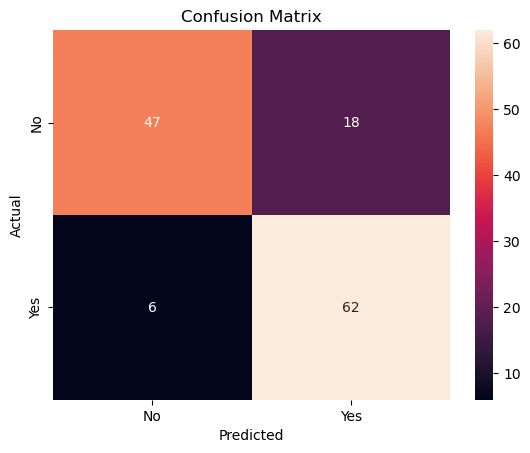

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot= True, ax = ax);

ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);


In [9]:
import pickle
import joblib
filename = 'loan_model2.h5'
classifier.save(filename)

In [20]:
from tensorflow import keras  # Import 'keras' from 'tensorflow'
from keras import Sequential
from keras.layers import Dense
sc = MinMaxScaler()
mdl = keras.models.load_model('C:/Users/Cris/loan_model2.h5')
X= pd.read_excel('C:/Users/Cris/test.xlsx')
X_test = sc.fit_transform(X)
y_pred = mdl.predict(X_test)
y_pred = (y_pred>0.61)

1/1 [==============================] - 1s 558ms/step


In [21]:
val=pd.DataFrame(y_pred, columns=['Status'])
val=val.replace({True: 'Approved', False: 'Rejected'})
val

,Status
0,Rejected
1,Rejected
2,Rejected
3,Rejected
4,Approved
5,Rejected
6,Approved
7,Rejected
8,Approved
9,Rejected


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from keras import Sequential
from keras.layers import Dense
import joblib

# Load the trained model
mdl = keras.models.load_model('C:/Users/Cris/loan_model2.h5')

# Create a list to store input data configurations that are more likely to be approved
likely_approval_configs = []

# Loop through different combinations of input features
for dependents in [0, 1, 2, 3]:
    for loan_amount in [10000, 50000, 100000, 150000]:
        for credit_history in [0, 1]:
            data = {
                "Dependents": dependents,
                "ApplicantIncome": 458300,
                "CoapplicantIncome": 15080,
                "LoanAmount": loan_amount,
                "Loan_Amount_Term": 360,
                "Credit_History": credit_history,
                "Gender_Female": 0,
                "Gender_Male": 1,
                "Married_No": 0,
                "Married_Yes": 1,
                "Education_Graduate": 1,
                "Education_Not_Graduate": 0,
                "Self_Employed_No": 0,
                "Self_Employed_Yes": 1,
                "Property_Area_Rural": 1,
                "Property_Area_Semiurban": 0,
                "Property_Area_Urban": 0
            }

In [44]:
 unit = np.array(list(data.values())).reshape(1, -1)

In [45]:
# Scale the input data

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(unit)
# Make loan prediction using the Keras model
prediction = mdl.predict(scaled_data)
# If the probability of approval is higher than a threshold, add it to the list
if prediction[0][0] > 0.61:  # Adjust the threshold as needed
                likely_approval_configs.append(data)
        

1/1 [==============================] - 1s 541ms/step


In [46]:
def predict_loan_approval(input_data, threshold=0.61):
    sc = MinMaxScaler()
    scaled_data = sc.fit_transform(np.array(list(input_data.values())).reshape(1, -1))

    # Make loan prediction using the Keras model
    prediction = mdl.predict(scaled_data)

    if prediction[0][0] > threshold:
        return 'Loan Application approved'
    else:
        # Compare input data with likely_approval_configs
        for config in likely_approval_configs:
            if input_data == config:
                return 'Loan would likely be approved'
        return 'Loan Application not approved'


In [47]:
# Example input data (you can replace this with your data)
input_data = {
    "Dependents": 0,
    "ApplicantIncome": 8000,
    "CoapplicantIncome": 0,
    "LoanAmount": 150000,
    "Loan_Amount_Term": 60,
    "Credit_History": 0,
    "Gender_Female": 0,
    "Gender_Male": 1,
    "Married_No": 0,
    "Married_Yes": 1,
    "Education_Graduate": 1,
    "Education_Not_Graduate": 0,
    "Self_Employed_No": 0,
    "Self_Employed_Yes": 1,
    "Property_Area_Rural": 0,
    "Property_Area_Semiurban": 1,
    "Property_Area_Urban": 0
}

result = predict_loan_approval(input_data)
print(result)


1/1 [==============================] - 0s 66ms/step
Loan Application approved
